In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.special import ellipk, ellipkinc
from scipy.special import ellipk, ellipkinc, ellipj, ellipeinc


C:\Users\Mohan Raj A\AppData\Local\Temp\ipykernel_18540\2845665621.py:35: RuntimeWarning: invalid value encountered in subtract
  lhs = (K_k - K_sigma0_k)**2


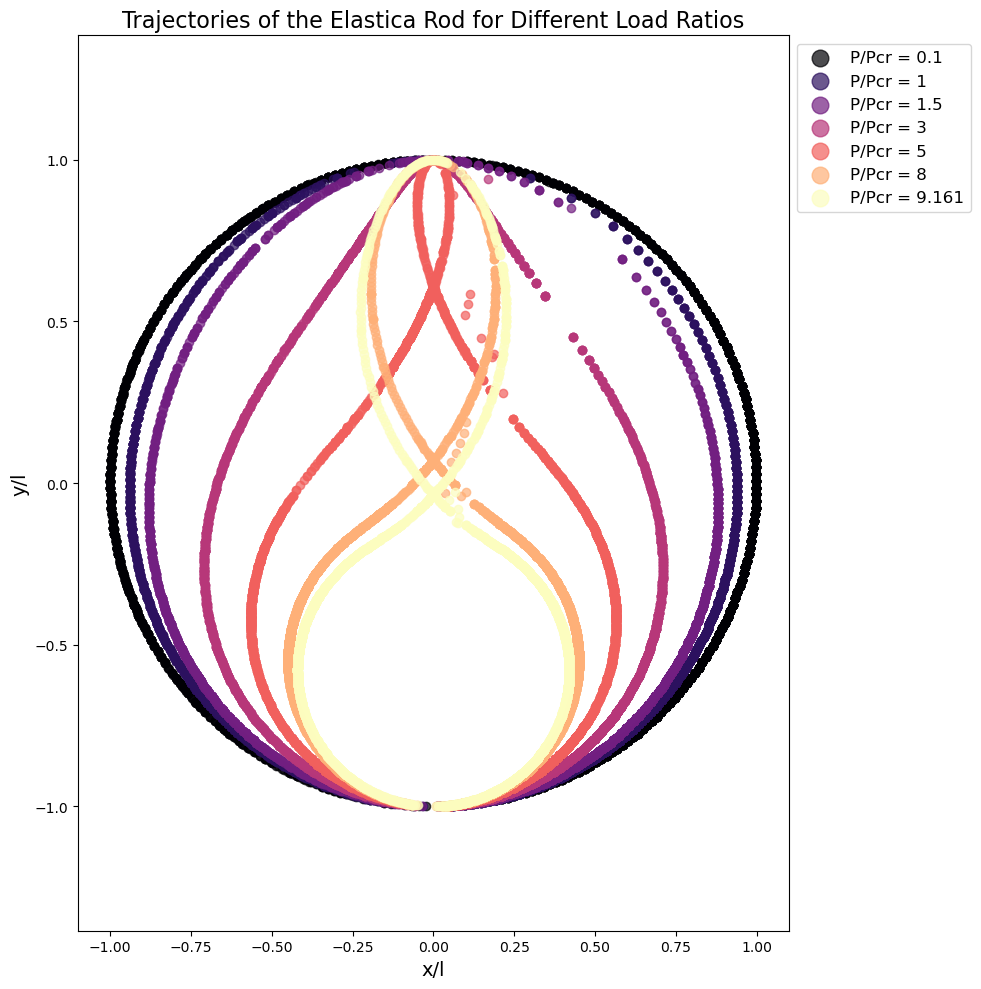

In [ ]:

B = 1.0       #
l = 1.0       
pi_sq_over_4 = (B * np.pi**2) / (4 * l**2) 


P_cr = pi_sq_over_4  
P_over_Pcr_values = [0.1,1,1.5,3,5,8,9.161]
alpha_end_points = np.ones(len(P_over_Pcr_values))*2

initial_guesses = np.linspace(0, 2 * np.pi, 50)
r_over_l_values = {}
psi_values = {}
cores_alpha = {}


def equilibrium_condition(theta_l, alpha, P_over_Pcr):
    lambda_sq = pi_sq_over_4 * P_over_Pcr  
    k = np.sin((theta_l + alpha - np.pi) / 2)
    
    if np.abs(k) > 1:
        return 1e6 
    term = (1 / k) * np.sin((alpha - np.pi) / 2)
    if np.abs(term) > 1:
        return 1e6  
    sigma0 = np.arcsin(term)
    
   
    K_k = ellipk(k**2)
    K_sigma0_k = ellipkinc(sigma0, k**2)
    
    lhs = (K_k - K_sigma0_k)**2
    P_normalized = P_over_Pcr * P_cr  
    return lhs - P_normalized


def compute_position_corrected(s_values, sigma0, k, lambda_val, l):
    x_values, y_values = [], []
    for s in s_values:
       
        u = s * lambda_val + ellipkinc(sigma0, k**2) 

        cn = ellipj(u, k**2)[1]  
        cn_k = ellipj(ellipkinc(sigma0, k**2), k**2)[1]  
        A1 = (cn - cn_k) * (-2 * k) / (lambda_val * l)
        
        
        am = ellipj(u, k**2)[3]  
        E_am = ellipeinc(am, k**2)  
        E_sigma0 = ellipeinc(sigma0, k**2)  
        A2 = -(s / l) + (2 / (lambda_val * l)) * (E_am - E_sigma0)
        
        x_values.append(A1)
        y_values.append(A2)
    return np.array(x_values), np.array(y_values)


plt.figure(figsize=(10, 10))
colors = plt.cm.magma(np.linspace(0, 1, len(P_over_Pcr_values)))

s_values = np.linspace(0, l, 100)  


for idx, (P_over_Pcr, alpha_end) in enumerate(zip(P_over_Pcr_values, alpha_end_points)):
    alphas = np.linspace(0,alpha_end*np.pi, 300)  
    x_end_values = []
    y_end_values = []
    for alpha in alphas:
        theta_solutions = []
    
        for guess in initial_guesses:
            theta_l_solution, info, ier, mesg = fsolve(equilibrium_condition, guess, args=(alpha, P_over_Pcr), full_output=True)
            if ier == 1:
                theta_l = theta_l_solution[0]
                theta_solutions.append(theta_l)
        
       
        unique_solutions = list(set(np.round(theta_solutions, decimals=5)))
        
        
        for theta_l in unique_solutions:
            k = np.sin((theta_l + alpha - np.pi) / 2)
            term = (1 / k) * np.sin((alpha - np.pi) / 2)
            sigma0 = np.arcsin(np.clip(term, -1, 1))
            lambda_val = np.sqrt(P_over_Pcr * pi_sq_over_4 / B)
            x, y = compute_position_corrected(s_values, sigma0, k, lambda_val, l)
            x_end_values.append(x[-1])
            y_end_values.append(y[-1])
        rbyl = []
        psiV = []
        alp = []
        for x_end, y_end in zip(x_end_values, y_end_values):
            r = np.sqrt(x_end**2 + y_end**2)  
            rbyl.append(r)
            psi = (3 * np.pi / 2) - np.arctan2(y_end, x_end)
            psiV.append(psi)
            alp.append(alpha)
        r_over_l_values[P_over_Pcr] = rbyl
        psi_values[P_over_Pcr] = psiV
        cores_alpha[P_over_Pcr] = alp
    plt.scatter(x_end_values, y_end_values, color=colors[idx], label=f'P/Pcr = {P_over_Pcr}', alpha=0.7)


plt.xlabel('x/l', fontsize=14)
plt.ylabel('y/l', fontsize=14)
plt.title('Trajectories of the Elastica Rod for Different Load Ratios', fontsize=16)
plt.legend(fontsize=12, markerscale=2, loc='upper left', bbox_to_anchor=(1, 1))
plt.axis('equal')
plt.tight_layout()
plt.savefig('Fig5.pdf')
plt.show()


C:\Users\Mohan Raj A\AppData\Local\Temp\ipykernel_2652\2426335118.py:18: RuntimeWarning: invalid value encountered in subtract
  lhs = (K_k - K_sigma0_k)**2


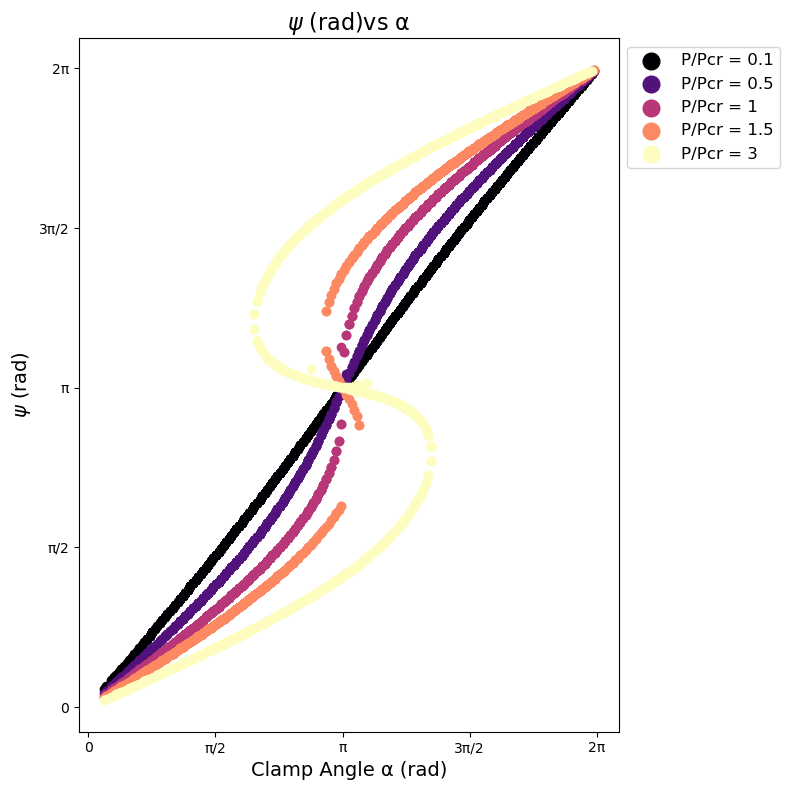

In [ ]:

alphas = np.linspace(0,2*np.pi, 200)
P_over_Pcr_values=[0.1,0.5,1,1.5,3]

def compute_r_over_l_with_alphas(alpha_values, s_values, P_over_Pcr, initial_guesses):
    valid_alphas = []
    r_over_l_values = []
    psi=[]
    M=[]

    for alpha in alpha_values:
        theta_solutions = []
        
        for guess in initial_guesses:
            try:
                theta_l_solution, info, ier, mesg = fsolve(equilibrium_condition, guess, args=(alpha, P_over_Pcr), full_output=True)
                if ier == 1:
                    theta_l = theta_l_solution[0]
                    theta_solutions.append(theta_l)
            except Exception:
                continue

        
        unique_solutions = list(set(np.round(theta_solutions, decimals=5)))

        
        for theta_l in unique_solutions:
            k = np.sin((theta_l + alpha - np.pi) / 2)
            if np.abs(k) > 1:
                continue 
            term = (1 / k) * np.sin((alpha - np.pi) / 2)
            if np.abs(term) > 1:
                continue  
            sigma0 = np.arcsin(np.clip(term, -1, 1))
            lambda_val = np.sqrt(P_over_Pcr * pi_sq_over_4 / B)
            x, y = compute_position_corrected([s_values[-1]], sigma0, k, lambda_val, l)
            r = np.sqrt(x[0]**2 + y[0]**2)
            psi_v=(3*np.pi/2)-np.arctan2(y[0],x[0]) 
            m=-x[0]
            if(psi_v)>2*np.pi:
                psi_v=-2*np.pi+psi_v
            psi.append(psi_v)
            r_over_l_values.append(r)
            valid_alphas.append(alpha)
            M.append(m)
    return np.array(valid_alphas), np.array(r_over_l_values),np.array(psi),np.array(M)


plt.figure(figsize=(8, 8))
colors = plt.cm.magma(np.linspace(0, 1, len(P_over_Pcr_values)))


for idx, P_over_Pcr in enumerate(P_over_Pcr_values):
    valid_alphas, r_over_l,psi_val,M_val = compute_r_over_l_with_alphas(alphas, s_values, P_over_Pcr, initial_guesses)
    plt.scatter(valid_alphas, psi_val, label=f'P/Pcr = {P_over_Pcr}', color=colors[idx])

plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
           ['0', 'π/2', 'π', '3π/2', '2π'])
plt.yticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
           ['0', 'π/2', 'π', '3π/2', '2π'])
plt.xlabel('Clamp Angle α (rad)', fontsize=14)
plt.ylabel('$\\psi$ (rad)', fontsize=14)
plt.title('$\\psi$ (rad)vs α', fontsize=16)
plt.legend(fontsize=12, markerscale=2, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
# plt.savefig('Fig6c.pdf')
plt.show()


C:\Users\Mohan Raj A\AppData\Local\Temp\ipykernel_2652\2426335118.py:18: RuntimeWarning: invalid value encountered in subtract
  lhs = (K_k - K_sigma0_k)**2


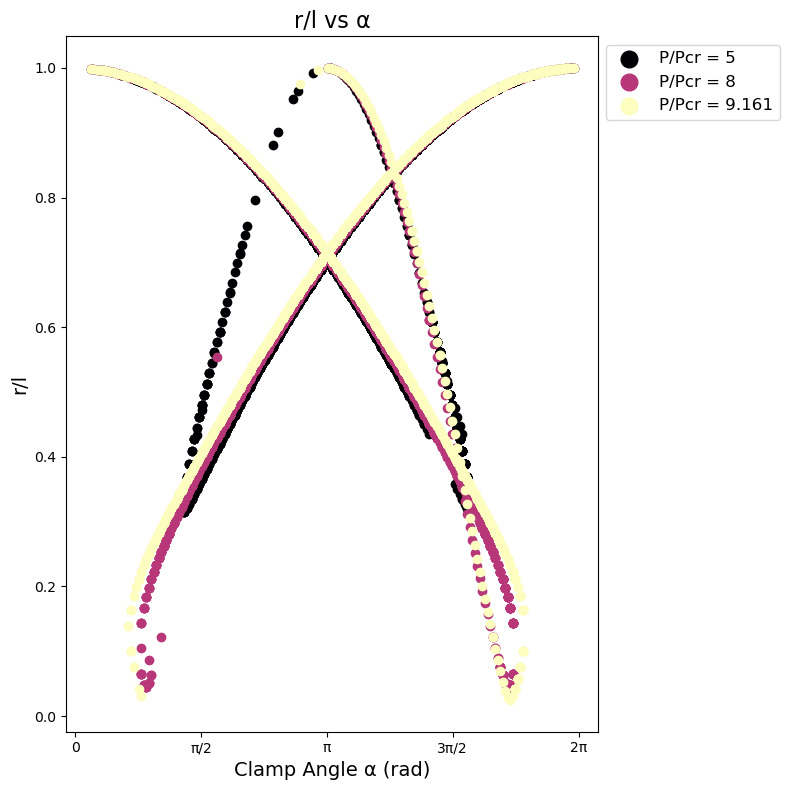

In [27]:
P_over_Pcr_values=[5,8,9.161]
plt.figure(figsize=(8, 8))
colors = plt.cm.magma(np.linspace(0, 1, len(P_over_Pcr_values)))
for idx, P_over_Pcr in enumerate(P_over_Pcr_values):
    valid_alphas, r_over_l,psi_val,M_val = compute_r_over_l_with_alphas(alphas, s_values, P_over_Pcr, initial_guesses)
    plt.scatter(valid_alphas, r_over_l, label=f'P/Pcr = {P_over_Pcr}', color=colors[idx])

plt.xlabel('Clamp Angle α (rad)', fontsize=14)
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
           ['0', 'π/2', 'π', '3π/2', '2π'])
plt.ylabel('r/l', fontsize=14)
plt.title('r/l vs α', fontsize=16)
plt.legend(fontsize=12, markerscale=2, loc='upper left', bbox_to_anchor=(1, 1))
# plt.grid(True)
plt.tight_layout()
plt.savefig('Fig6b.pdf')
plt.show()


C:\Users\Mohan Raj A\AppData\Local\Temp\ipykernel_2652\2426335118.py:18: RuntimeWarning: invalid value encountered in subtract
  lhs = (K_k - K_sigma0_k)**2


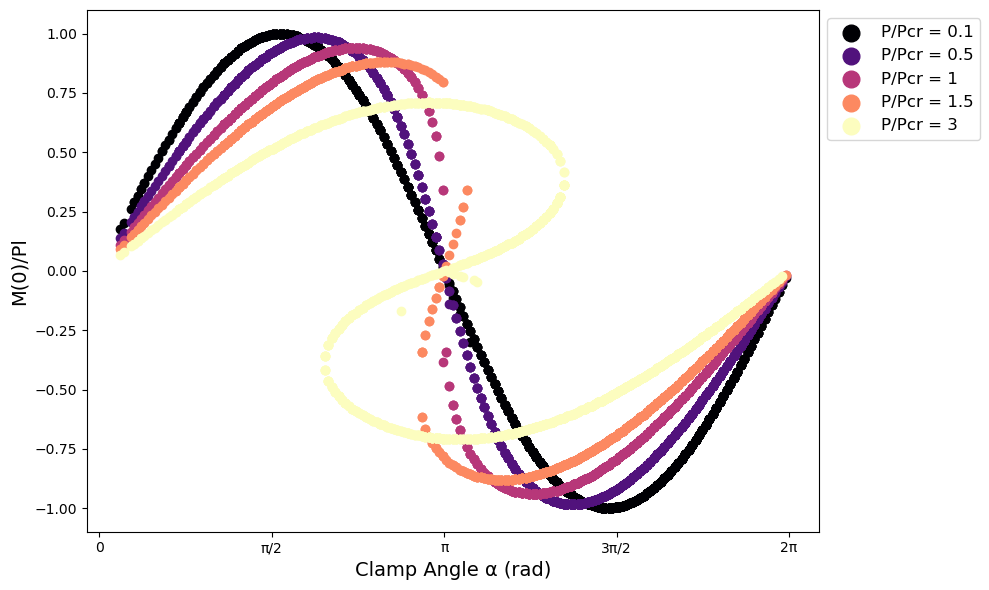

In [30]:
P_over_Pcr_values=[0.1,0.5,1,1.5,3]
plt.figure(figsize=(10, 6))
colors = plt.cm.magma(np.linspace(0, 1, len(P_over_Pcr_values)))
for idx, P_over_Pcr in enumerate(P_over_Pcr_values):
    valid_alphas, r_over_l,psi_val,M_val = compute_r_over_l_with_alphas(alphas, s_values, P_over_Pcr, initial_guesses)
    plt.scatter(valid_alphas, M_val, label=f'P/Pcr = {P_over_Pcr}', color=colors[idx])

plt.xlabel('Clamp Angle α (rad)', fontsize=14)
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
           ['0', 'π/2', 'π', '3π/2', '2π'])
plt.ylabel('M(0)/Pl', fontsize=14)
# plt.title('r/l vs α', fontsize=16)
plt.legend(fontsize=12, markerscale=2, loc='upper left', bbox_to_anchor=(1, 1))
# plt.grid(True)
plt.tight_layout()
plt.savefig('Fig8a.pdf')
plt.show()
